In [1]:
import numpy as np
import matplotlib.pyplot as plt

from izhikevich_rnn import Izhikevich
from test_models import LorenzAttractor

In [2]:
T = 2000
dt = 4e-2
t = np.arange(0, T, dt)

x = np.sin(100 * t / 1000)
x = x.reshape(-1, 1)

In [3]:
init = np.array([0., 1., 1.05], dtype=float).reshape(-1, 1)
lorenz = LorenzAttractor(xyz=init)

conversion_factor = 1/10

time, xyz = lorenz.render(T=T*conversion_factor, dt=dt*conversion_factor)

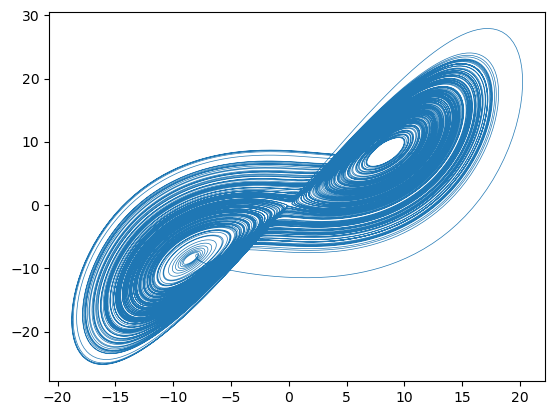

In [4]:
plt.plot(xyz[:, 0], xyz[:, 1], lw=.5)
plt.show()

In [6]:
model = Izhikevich(supervisor=xyz, T=T, dt=dt, N=2000)

voltage_trace = model.render(rls_start=2, rls_stop=T/2, rls_step=2, n_neurons=10)

100%|██████████| 50000/50000 [30:30<00:00, 27.32it/s]  


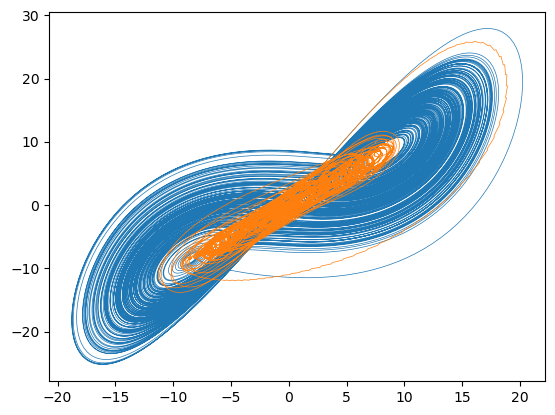

In [7]:
plt.plot(xyz[:, 0], xyz[:, 1], lw=.5)
plt.plot(model.x_hat_rec[:, 0], model.x_hat_rec[:, 1], lw=.5)
plt.show()